# Part 1

## 1.
**Assume each customer type is equally common. A customer walks into your store and purchases a product. What's the probability that this customer is of Type A, given that they purchased a product?**

    Set-up:

    Pr(purchase/Type A)=0.01

    Pr(purchase/type B)=0.1

    ________________________

    Pr(Type A)=Pr(Type B)=0.5

    Pr(purchase)=Pr(purchase/Type A)*Pr(Type A)+Pr(purchase/Type B)*Pr(Type B)

    =(0.01*0.5) + (0.1*0.5)
    =0.055

## 2.
**This is how the probability found in question 1 would change if more customers were of Type A:**
    

    Pr(Type A/purchase)=Pr(purchase/Type A)*Pr(Type A)/Pr(purchase)

    =(0.01*0.5)/0.055
    =0.091
    
    This is an increase to Pr(purchase). So the answer to the question would be:
    
    I. **Increase**

## 3.

In [126]:
def A_Prob(TypeA):
    #P(purchase/Type A)*P(Type A) + P(purchase/Type B)*P(Type B)
    
    TypeB = 1-TypeA
    
    TypeAProb = (0.01*TypeA) + (.1*TypeB)
    
    print(TypeAProb)

In [127]:
A_Prob(.5)

0.055


# Part 2

Data exploration idea I would like to pursue:

# How does health insurance type (attributes/cost) differ across states and over time?


I. My exploration idea is to see what sort of insurance plans cost most and if these vary across different regions of America and years. This interests me because there is a huge variety of health plans tailored to how healthy people are/if they have prior conditions, how concerned people are about preventative health. So I was curious about the different price points for each and how these may vary from state-to-state and year-to-year.

Answers to this would give insight into different demographic make-up of each state which would influence health insurance sellers' target groups. Health insurance types' consumption over time would give insight into how a certain plans may grow or lose popularity.


II. Scope of what data is required:
### Data tables to look at in order to answer this exploration idea:
    -BenefitsCostSharing
    -Rate
    
III. Methodology I want to pursue:
    a. Clean up the data
    b. Present descriptive Statistics (location of data (mean/median), spread of data (how variable is it around mean/median)
    c. Present comparative graphs (e.g. smokers' plans more expernsive than non-smokers and does this apply across states and time?)
    d. Visual map of US showing differing types of healthcare plans across states
    
IV. Outstanding concerns with analysis plan:
Data is filled with a lot of NaN's and data in one column may mean the same thing, but input differently in database ($0 versus 0).

In [128]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

# 1. Data Integrity

a. Need to inspect data and see if there are any NaN's that need to be taken out/replaced with 0's.
b. If there are outliers, take these out as well.

In [129]:
BenCosts = pd.read_csv("BenefitsCostSharing.csv")
BenCosts.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.



,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [130]:
BenCosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
BenefitName            object
BusinessYear           int64
CoinsInnTier1          object
CoinsInnTier2          object
CoinsOutofNet          object
CopayInnTier1          object
CopayInnTier2          object
CopayOutofNet          object
EHBVarReason           object
Exclusions             object
Explanation            object
ImportDate             object
IsCovered              object
IsEHB                  object
IsExclFromInnMOOP      object
IsExclFromOonMOOP      object
IsStateMandate         object
IsSubjToDedTier1       object
IsSubjToDedTier2       object
IssuerId               int64
IssuerId2              int64
LimitQty               float64
LimitUnit              object
MinimumStay            float64
PlanId                 object
QuantLimitOnSvc        object
RowNumber              int64
SourceName             object
StandardComponentId    object
StateCode          

In [131]:
BenCosts.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

Due to huge amount of NaN's will not eliminate rows that contain them, but rather replace NaN's with 0's to not compromise data's wealth of information.

In [132]:
CleanBenCosts = BenCosts.fillna(0)

In [133]:
# Check to see if NaN's are left.
CleanBenCosts.isnull().sum()

BenefitName            0
BusinessYear           0
CoinsInnTier1          0
CoinsInnTier2          0
CoinsOutofNet          0
CopayInnTier1          0
CopayInnTier2          0
CopayOutofNet          0
EHBVarReason           0
Exclusions             0
Explanation            0
ImportDate             0
IsCovered              0
IsEHB                  0
IsExclFromInnMOOP      0
IsExclFromOonMOOP      0
IsStateMandate         0
IsSubjToDedTier1       0
IsSubjToDedTier2       0
IssuerId               0
IssuerId2              0
LimitQty               0
LimitUnit              0
MinimumStay            0
PlanId                 0
QuantLimitOnSvc        0
RowNumber              0
SourceName             0
StandardComponentId    0
StateCode              0
StateCode2             0
VersionNum             0
dtype: int64

In [134]:
CleanBenCosts[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                         
                   count unique                        top   freq
BusinessYear                                                     
2014             1164869    496  Major Dental Care - Adult  18719
2015             2079286    517        Orthodontia - Adult  31269
2016             1804253    429        Orthodontia - Adult  27389

For 2014: 1.2 million plans bought, close to 500 different ones with adult dental care toping the list at close to 19,000 bought.

For 2015: 2 million plans bought, over 500 different ones with adult orthodontic dental care toping the list with over 30,000 of these plans bought. 2015 was a huge revenue boost for health insurance companies/brokers.
    
For 2016: 1.8 million plans bought, around 430 different ones only and adult orthodontic dental care toping the list with close to 27,000 of these plans bought.    
    
Another cut of the data that we can do is naming the most popular benefit plans per state. This could give way to state demographics, which was not supplied in available dataset.

Now let us see what the benefit plans are spread across states. We just need to substitute out BusinessYear with StateCode feature.

In [135]:
CleanBenCosts[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              41320     84        Major Dental Care - Adult   720
AL              28417    115        Basic Dental Care - Adult   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195     Dental Check-Up for Children  3345
DE              31370    110     Dental Check-Up for Children   602
FL             364742    194              Orthodontia - Child  5130
GA             196579    151              Orthodontia - Adult  2893
HI               6741     76     Dental Check-Up for Children   110
IA             110221    104              Orthodontia - Adult  1727
ID              27313     71        Major Dental Care - Child   447
IL             320533    157              Orthodontia - Child  4299
IN             148531    109        Basic Dental Care - Adult  2347
KS              64279     82  Routine Dental Services (Adult)  1087
LA              91816    125  Routine Dental Services (Adult)  1491
ME              61834     99        Major Dental Care - Child   975
MI             189225    205        Basic Dental Care - Adult  3248
MO              95152    127        Major Dental Care - Adult  1577
MS              46895    104        Basic Dental Care - Adult   725
MT              58132     75        Major Dental Care - Adult  1049
NC              94290     98              Orthodontia - Adult  1537
ND              48269     77        Major Dental Care - Adult   974
NE              66935     90        Basic Dental Care - Child  1238
NH              44305     98        Basic Dental Care - Child   707
NJ              86107    100              Orthodontia - Adult  1357
NM              56669     78        Major Dental Care - Adult   828
NV              62743    121              Orthodontia - Adult   930
OH             331045    193        Major Dental Care - Child  5092
OK             133639     83              Orthodontia - Adult  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157        Major Dental Care - Adult  4208
SC             111907     85              Orthodontia - Adult  1817
SD              47730     79              Orthodontia - Adult   843
TN             138154    129     Dental Check-Up for Children  2073
TX             465164    180        Basic Dental Care - Adult  6441
UT              98421    101              Orthodontia - Adult  1527
VA             142236    145              Orthodontia - Adult  2256
WI             512587    146                Accidental Dental  7135
WV              32638     77  Routine Dental Services (Adult)   625
WY              48425     92              Orthodontia - Adult   807

So interesting! Dental care is at the top of each state accounted for. I would not have thought this since Dental Insurance is not an essential health benefit for those over 18 years old, but for children it is.

In [136]:
CleanBenCosts[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Distinct_State = CleanBenCosts.StateCode.unique()
Benefit = []

for state in Distinct_State:
    state_benefit =  len(CleanBenCosts[CleanBenCosts["StateCode"] == state])    
    Benefit.append(state_benefit)  

It is best to have bar counts in descending order from top to bottom in order to visualize where most plans are sold in the US. This would give suggestion to where to target marketing teams/where to target sales efforts.

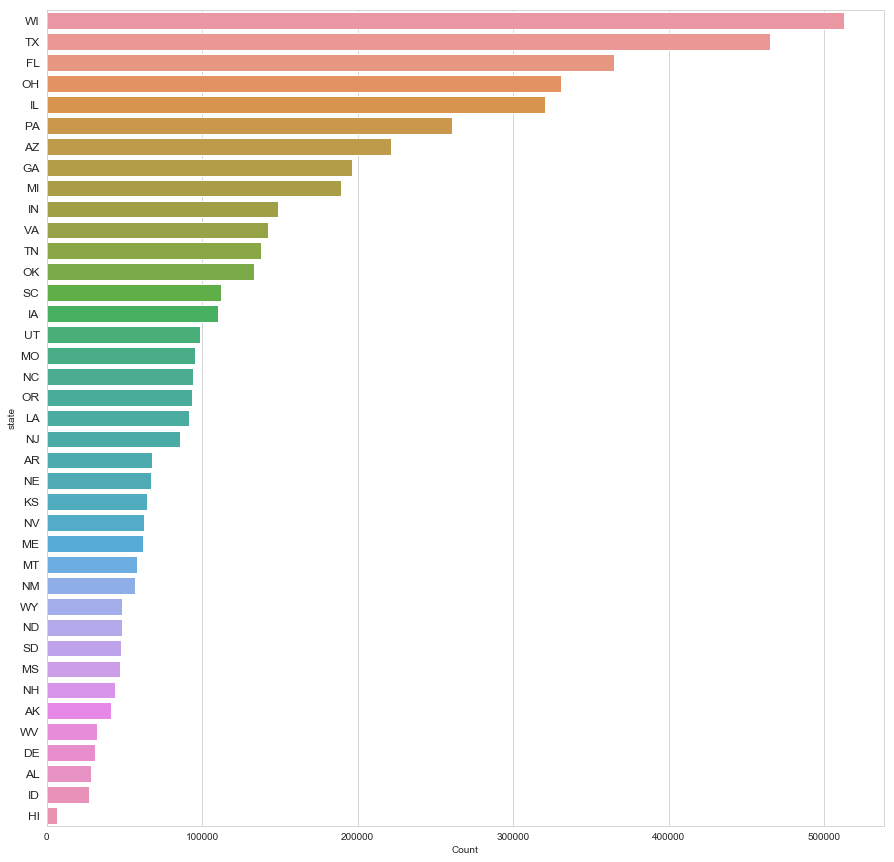

In [137]:
df = pd.DataFrame(
    {'state': Distinct_State,
     'Count' : Benefit
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()

Great! We can see from here that number of benefit plans across states only reach beyond 300,000 mark for WI, TX, FL, OH and IL. It is surprising that WI tops the list since TX is the second largest state in the US and FL is the state with the most old people.

To take this visualization further, we can look at benefit plans on a US map. Gradients of color represent volume of benefit plans per state. Moving cursor over a state will give you the exact number of benefit plans and the two-letter state abbreviation.

In [138]:
data = dict(type = 'choropleth',
           locations = df['state'],
           locationmode = 'USA-states',
           colorscale = 'Cividis',
            text = df['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = df['Count'],
           colorbar = {'title':'No of Benefit plans'})

layout = dict(title = '2014-2016 Benefit Plans by State (Hover for Breakdown)',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(255,255,255)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

With this map, can see that some states do not have data at all, such as CA, WA, CO, MN, KY, MD, NY and states left of NH. This is a data integrity issue since CA and NY are huge states right beside TX. A lot of data on the US as a whole is missing then. This data hole impacts analysis conclusions more so if there were final comments made in relation to US as a whole.

Some census data would help since the density of plans across states do not account for everyone in each state. Some data on how many people are in each state would help with seeing how many uninsured could be targeted for health insurance sales. Other Census data that would help would be to see what are health benefits cut across gender, socioeconmic status, etc.

# Now, it would be nice to see cost of healthcare costs across time and states.

We will now move forward to a different dataset called Rate. Here, we will see how different insurance rates vary across individuals who do not use tobacco and those who do across time and across states.  

In [139]:
Rate = pd.read_csv("Rate.csv")
Rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


Let us first take a look at how many NaN's there are and in the dataset.

In [140]:
Rate.BusinessYear.isnull().sum(), Rate.Age.isnull().sum(), Rate.IndividualRate.isnull().sum()

(0, 0, 0)

In [141]:
Rate.IndividualTobaccoRate.isnull().sum()

7762096

In [142]:
Rate.Couple.isnull().sum()

12653504

In [143]:
Rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
SourceName                                   object
VersionNum                                   int64
ImportDate                                   object
IssuerId2                                    int64
FederalTIN                                   object
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
Pr

In [144]:
12653504/12694445

0.9967748885437685

Given that group rate columns have around 99.6% missing data, will only compare different individual rates across time and states.

## Clean IndTobaccoRate data column

In [145]:
Rate.IndividualTobaccoRate = Rate.IndividualTobaccoRate.fillna(0)

Check to see if there are any more NaN's.

In [146]:
Rate.IndividualTobaccoRate.isnull().sum()

0

There are none. Great!

Now that the data is clean, let us take a look at individual costs with and without tobacco use across time.

In [147]:
Rate[["BusinessYear","IndividualRate","IndividualTobaccoRate"]].groupby('BusinessYear').describe()

IndividualRate                                                   \
                      count          mean            std  min    25%     50%   
BusinessYear                                                                   
2014              3796388.0  12922.257001  111452.391035  0.0  32.11  296.43   
2015              4676092.0    329.161861     525.002167  0.0  28.43  283.38   
2016              4221965.0    337.539257     536.053504  0.0  28.49  296.30   

                                IndividualTobaccoRate                          \
                 75%        max                 count        mean         std   
BusinessYear                                                                    
2014          480.14  999999.00             3796388.0  240.926268  352.947647   
2015          469.69    9999.99             4676092.0  198.409085  304.982986   
2016          488.07    9999.00             4221965.0  198.780763  310.452054   

                                              
              min  25%  50%     75%      max  
BusinessYear                                  
2014          0.0  0.0  0.0  427.64  6604.61  
2015          0.0  0.0  0.0  367.77  2379.86  
2016          0.0  0.0  0.0  376.96  2677.79

There seems to be outliers in IndividualRate column since there is one value/multiple of them coming out at 999999.00. Let us boxplot this to see the spread of data.

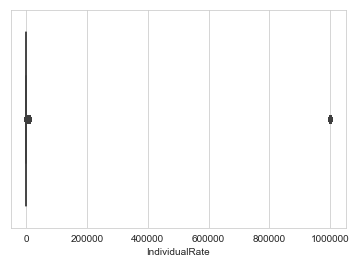

In [148]:
ax = sns.boxplot(x=Rate["IndividualRate"])

This boxplot rendering is skewed because the data is that skewed. Outlier values of 999999.00 are cause for the box to look like a line. All the data points are concentrated near the left side because the gap between most of the points and the outlier is huge. The box plot will look different with IndividualTobaccoRate distribution since the outliers are not as extreme in its dataset.

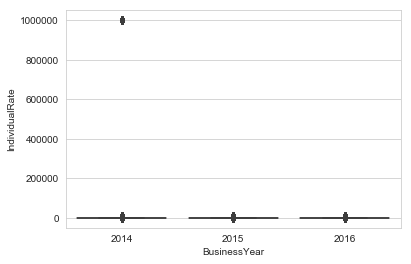

In [149]:
sns.boxplot(x="BusinessYear", y="IndividualRate", data=Rate)

We can see here that the cause of the skewed data is due to outliers coming from 2014 data. If time permitted, this would be taken out to clean up the data and not have such a widespread of datapoints.

In [150]:
Rate['BusinessYear'] = pd.to_datetime(Rate['BusinessYear'].astype(str), format='%Y')

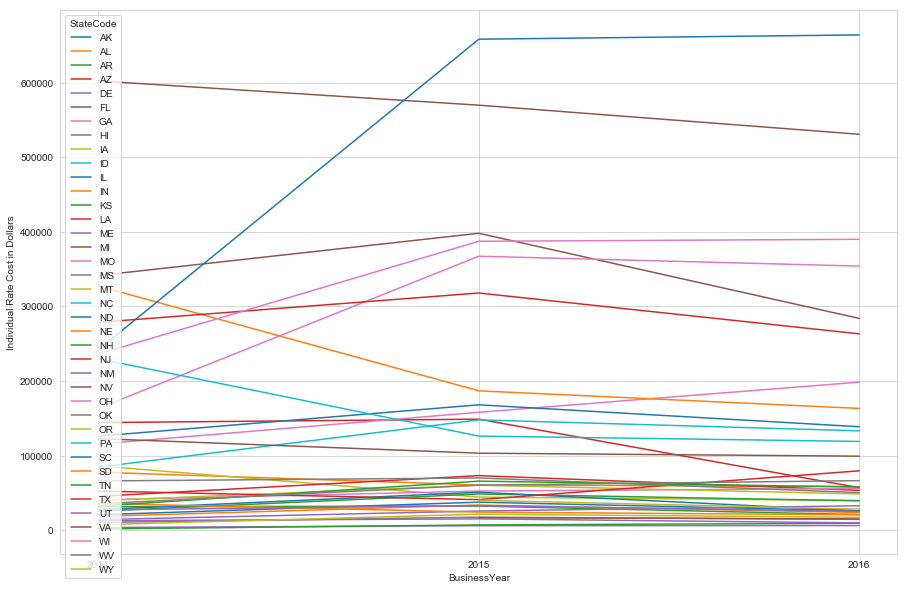

In [151]:
#State Groups' % Ind Rates vs. Time
fig, ax = plt.subplots(figsize=(15,10))
plt.ylabel('Individual Rate Cost in Dollars')

Rate.groupby(['BusinessYear','StateCode']).count()['IndividualRate'].unstack().plot(ax=ax)

Based on this graph, the only drastic changes in IndividualRate costs from year to year is one state's (dark blue and highest located line in graph). It had a steep increase in rates from 2014-2015 and then flattened out from 2015-2016. The reverse is true for two states (one orange and another light blue between 220K-320K cost) which have a decline from 2014-2015 and then even out from 2015-2016. Otherwise, about 10 states fall outside of the rates that are common to 37 other states' individual rates for those who do not use tobacco.

Now let us see how rates are with individuals who are tobacco users. Here, the distribution is not as extreme based on summary statistics for IndividualTaboccoRate users. Let us make sure by plotting a boxplot distribution.

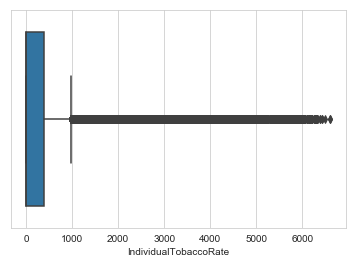

In [152]:
ax = sns.boxplot(x=Rate["IndividualTobaccoRate"])

Great! There are still outliers, but at least the box is visible, which is where 25th percentile, Median and 75th percentile of data points reside.

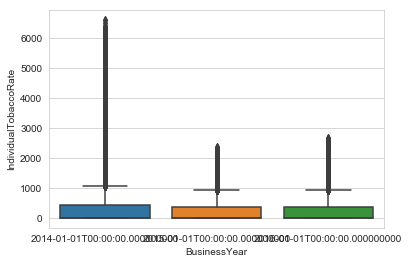

In [153]:
sns.boxplot(x="BusinessYear", y="IndividualTobaccoRate", data=Rate)

This was not evident when the column was boxplotted as a whole. There are obviously huge outliers in 2014. This is to keep in mind when drawing any conclusions from that portion of the dataset.

In [154]:
Statelist = Rate['StateCode'].unique()
Statelist = np.sort(Statelist)

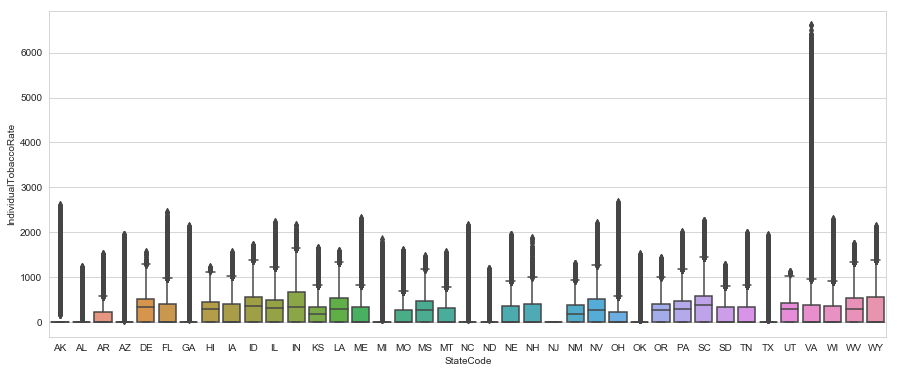

In [155]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualTobaccoRate", data=Rate, order=Statelist)

As we can see here that most states have around the same Individual Tobacco Rates. However VA is the state with the most extreme values and is most likely the cause for 2014 boxplot to have so many outliers compared to the other years.

# Overall Lessons

Data integrity is key prior to working with such massive datasets as above. The huge amount of NaN's at times cautioned me from providing too general of summary statistics where the number of datapoints remaining did not provide enough solid representation of real life population data. Also, outliers can create huge fluctuations where the general centrality of data is. This can compromise conclusions drawn from this sort of data. 

Definitely, adoption of health plans vary across time and states. Individual Rate plans increased from 2014 to 2015 and stabilized after 2015. However, this is most likely due to skewed data. Health plan rates between non-Tobacco users and Tobacco users differed, but not a good conlusion to make on data that was skewed. Definitely there was one state that stood out between two different rates compared. This is where outliers are though. So in general, state-to-state, within each rate, states do not differ much in what health insurance charges.

# Next Steps

If there was more time and resources, I would definitely evolve my data analysis by going into: 
    1. What sort of health insurance do people buy if they are heading into maturnity leave?
    2. What sort of health insurance is bought when payers are under Medicare (>65)?
    3. Are there more purchases in a certain socioeconomic cut of America?
    5. When are most purchases besides during open enrollment in November?
    6. Who usually buys HMO/PPO?
    7. How much of the US buys individual plans versus group plans?
    8. Are there plans that are exclusive to states?